데이터 다운로드: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
data = pd.read_csv("./data/fraud.csv")
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# 현재화면에 보여지는 컬럼, 로우 수를 늘려주기
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format','{:.3f}'.format)
                # 지수는 소수점아래 3자리 까지만


In [5]:
# info'
data.info()
# 옵션더주기

In [4]:
# info에도 생략된 내용은 모두나오지 않아서 옵션더주기
data.info(show_counts=True)
# 전체 사용량도 확인가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

- trans_date_trans_time : 거래 시간
- cc_num : 카드 번호. 고유값이기 때문에 여기서는 id처럼 활용할 수 있습니다.
- merchant : 거래 상점
- category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
- amt : 거래 금액
- first / last : 이름
- gender : 성별
- street / state / zip : 고객 거주지 정보
- lat / long : 고객 주소에 대한 위도 및 경도
- city_pop : 고객이 zipcode에 속하는 인구 수
- job : 직업
- dob : 생년월일
- trans_num : 거래번호
- unix_time : 거래 시간(유닉스 타임스탬프 형식)
- merch_lat / merch_long : 상점 위치에 대한 위도 및 경도
- is_fraud : 사기거래 여부 (종속변수)

In [4]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

### select_dtype으로 분류

In [ ]:
data.isna().sum() # 분류전에 결측한번더 확인

In [10]:
obj_cols=data.select_dtypes(include='object')
num_cols=data.select_dtypes(exclude='object')

In [11]:
obj_cols.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [14]:
for col in obj_cols:
    print("="*20, col, "="*20)
    print(obj_cols[col].nunique(), end="\n\n")
    print(obj_cols[col].value_counts(), end="\n\n")
    print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud',ascending=False),end="\n\n")

==================== trans_date_trans_time ====================
1819551

trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2020-10-05 19:37:49    4
2020-12-13 17:53:47    4
                      ..
2019-01-01 00:41:45    1
2019-01-01 00:42:26    1
2019-01-01 00:43:38    1
2019-01-01 00:44:20    1
2020-12-31 23:50:17    1
Name: count, Length: 1819551, dtype: int64

                       is_fraud
trans_date_trans_time          
2019-09-11 22:58:11       1.000
2019-12-22 01:09:30       1.000
2019-02-12 23:49:17       1.000
2019-09-23 06:33:47       1.000
2019-05-03 04:38:52       1.000
...                         ...
2019-01-01 00:41:45       0.000
2019-01-01 00:42:26       0.000
2019-01-01 00:43:38       0.000
2019-01-01 00:44:20       0.000
2020-12-31 23:50:17       0.000

[1819551 rows x 1 columns]

==================== merchant ====================
693

merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC             

            is_fraud
dob                 
2001-07-17     1.000
2002-03-17     1.000
1925-08-29     1.000
1927-02-03     1.000
1944-05-30     1.000
...              ...
1949-10-04     0.000
1975-04-16     0.000
1973-10-19     0.000
1975-06-29     0.000
1930-02-28     0.000

[984 rows x 1 columns]

==================== trans_num ====================
1852394

trans_num
1765bb45b3aa3224b4cdcb6e7a96cee3    1
0b242abb623afc578575680df30655b9    1
1f76529f8574734946361c461b024d99    1
a1a22d70485983eac12b5b88dad1cf95    1
6b849c168bdad6f867558c3793159a81    1
                                   ..
413636e759663f264aae1819a4d4f231    1
8a6293af5ed278dea14448ded2685fea    1
baae0b096835c975857eea7e28dde3dc    1
991c04803b4d4eeab30d6245a872e3d3    1
f12cf52be2175703db789a4644c32f25    1
Name: count, Length: 1852394, dtype: int64

                                  is_fraud
trans_num                                 
1beffe8ba58d868ca424b2da19aa17c5     1.000
347b8b8d2898fc0e3a3a4dee5026a397     1.0

### 위 내용을 보고서 불필요한 컬럼은 삭제
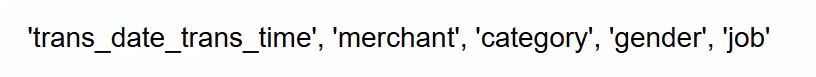

In [15]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(data, title="Profiling Report")

In [18]:
profile.to_file("is_fraud_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [01:09<00:00,  3.18s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# is_fraud의 비율
data['is_fraud'].mean() * 100

np.float64(0.5210014716091717)

# 카드별(고객) 거래 금액에서 이상치를 찾고 is_fraud와 관계보기

In [20]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [25]:
# 멀티인덱스있는 desc
amt_desc=data[['cc_num','amt']].groupby('cc_num').describe()
amt_desc # 카드 999개에대한 값. 999rows를 통해 확인.

,count,mean,std,min,25%,50%,75%,max
cc_num,,,,,,,,
60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460
60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370
60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770
60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360
60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460
...,...,...,...,...,...,...,...,...
4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860
4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440
4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430


In [25]:
# 멀티인덱스 안써서 더 편하게.
amt_desc=data[['cc_num','amt']].groupby(['cc_num'])['amt'].describe()
amt_desc # 카드 999개에대한 값. 999rows를 통해 확인.

,count,mean,std,min,25%,50%,75%,max
cc_num,,,,,,,,
60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460
60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370
60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770
60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360
60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460
...,...,...,...,...,...,...,...,...
4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860
4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440
4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430


In [26]:
amt_desc.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [27]:
amt_desc['iqr_max']= amt_desc['75%']+(1.5*(amt_desc['75%']-amt_desc['25%']))

In [29]:
# 'iqr_max' 포함
amt_desc

,count,mean,std,min,25%,50%,75%,max,iqr_max
cc_num,,,,,,,,,
60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460,170.666
60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370,204.100
60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770,175.486
60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360,159.065
60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460,164.995
...,...,...,...,...,...,...,...,...,...
4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860,197.892
4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440,206.697
4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430,195.946


In [32]:
amt_desc=amt_desc.reset_index()
amt_desc

,cc_num,count,mean,std,min,25%,50%,75%,max,iqr_max
0,60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460,170.666
1,60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370,204.100
2,60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770,175.486
3,60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360,159.065
4,60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460,164.995
...,...,...,...,...,...,...,...,...,...,...
994,4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860,197.892
995,4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440,206.697
996,4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430,195.946
997,4989847570577635369,1471.000,93.009,128.397,1.030,19.940,57.170,111.945,1223.850,249.952


# 원본 data와 그룹연산 결과 합치

In [33]:
# 컬럼들 이름바꾸기'
amt_desc.columns

Index(['cc_num', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'iqr_max'],
      dtype='object')

In [30]:
# 컬럼들 이름바꾸기'
amt_desc.columns=['cc_num', 'amt_mean', 'amt_std', 'amt_min','amt_iqr_max']

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'iqr_max'], dtype='object')

In [34]:
pd.merge(data, amt_desc[['cc_num','mean', 'std','iqr_max']])
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.493,-91.891,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.947,-91.333,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.039,-95.440,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661,-96.187,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.197,-118.902,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658,-119.715,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.626,-116.449,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.471,-117.081,0


In [35]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [38]:
data=data.drop(['first', 'last','street', 'city', 'state', 'zip','lat',
       'long', 'city_pop','unix_time'.axis=1])
data

SyntaxError: invalid syntax (3268930910.py, line 2)

# Zscore 사기비율계산
Zscore -> ( 값-평균 ) / 표준편차 <br>
-3 > Zscore > 3

# 사용자가 주로 어디에지출하나?
- 평소 지출하던 카테고리/ 가게가 아닌 경우
- 카드 번호별, 카테고리별 지출 평균, 표준편차

In [39]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [40]:
# 카드번호, 카테고리별 지출 평균과 표준편차를 구해야함
# groupby 에 옵션2가지
data.groupby(['cc_num', 'category'])['amt'].agg(['mean','std'])

mean     std
cc_num              category                     
60416207185         entertainment  51.839  65.486
                    food_dining    26.737  46.383
                    gas_transport  59.779  15.758
                    grocery_net    52.153  17.695
                    grocery_pos   101.558  21.894
...                                   ...     ...
4992346398065154184 misc_pos       60.003 167.226
                    personal_care  48.777  49.524
                    shopping_net   86.280 217.047
                    shopping_pos   64.213 169.239
                    travel         70.527 496.591

[13171 rows x 2 columns]

In [41]:
# 인덱스 리셋하여 컬럼으로 
cat_amt=data.groupby(['cc_num', 'category'])['amt'].agg(['mean','std']).reset_index()
cat_amt

,cc_num,category,mean,std
0,60416207185,entertainment,51.839,65.486
1,60416207185,food_dining,26.737,46.383
2,60416207185,gas_transport,59.779,15.758
3,60416207185,grocery_net,52.153,17.695
4,60416207185,grocery_pos,101.558,21.894
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.003,167.226
13167,4992346398065154184,personal_care,48.777,49.524
13168,4992346398065154184,shopping_net,86.280,217.047
13169,4992346398065154184,shopping_pos,64.213,169.239


In [42]:
cat_amt.columns

Index(['cc_num', 'category', 'mean', 'std'], dtype='object')

In [43]:
cat_amt.columns=['cc_num', 'category', 'cat_amt_mean', 'cat_amt_std']
cat_amt

,cc_num,category,cat_amt_mean,cat_amt_std
0,60416207185,entertainment,51.839,65.486
1,60416207185,food_dining,26.737,46.383
2,60416207185,gas_transport,59.779,15.758
3,60416207185,grocery_net,52.153,17.695
4,60416207185,grocery_pos,101.558,21.894
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.003,167.226
13167,4992346398065154184,personal_care,48.777,49.524
13168,4992346398065154184,shopping_net,86.280,217.047
13169,4992346398065154184,shopping_pos,64.213,169.239


In [44]:
# 카드번호와 카테고리가 맞는것들이 data에 붙도록.
pd.merge(data, cat_amt, how='left', on=['cc_num', 'category'])

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cat_amt_mean,cat_amt_std
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0,84.861,116.070
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0,99.637,23.904
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0,46.653,60.385
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0,61.537,15.747
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0,35.481,4.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.493,-91.891,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.947,-91.333,0,45.931,45.150
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.039,-95.440,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661,-96.187,0,50.924,52.342
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.197,-118.902,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658,-119.715,0,63.857,52.309
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.626,-116.449,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.471,-117.081,0,8.192,27.244


In [46]:
# 이것의 상한하한 z스코어
data['cat_amt_zscore']=(data['amt']-data['cat_amt_mean']) / data['cat_amt_std']

KeyError: 'cat_amt_mean'

In [ ]:
# z스코어로 
data[(data['cat_amt_zscore']<-3) | data['cat_amt_zscore']>3

# 거주지와 merchant의 위치간 상관관계가 높음
- 지나치게 먼 거리에서 지출한 경우<br> 평균거리를 초과하는곳에서 이루어진 거래를 부당 거래로 보고 검출
- geopy 라이브러리 활용하기
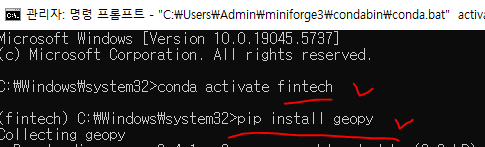
- 위도 경도 정보로 집과의 거리 계산

In [53]:
from geopy.distance import distance

In [54]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [58]:
print(distance((data['lat'][0],data['long'][0]),(data['merch_lat'][0],data['merch_long'][0])).km)

78.77382075373654


In [60]:
data['dist'] = data.apply(
    lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km,
    axis=1
)

print(data)

KeyboardInterrupt: 

In [61]:
# 카드번호 별로 
dist_desc= data.groupby(['cc_num'])['dist'].agg(['mean','std']).reset_index()
dist_desc

KeyError: 'Column not found: dist'

In [ ]:
dist_desc.columns=['cc_num','dist_mean','dist_std']

In [ ]:
pd.merge(data, dist_desc, how='left', on='cc_num')

In [ ]:
# 이것의 상한하한 z스코어
data['dist_zscore']=(data['amt']-data['dist_mean']) / data['cat_amt_std']

In [ ]:
# z스코어로 
data[(data['cat_amt_zscore']<-3) | data['cat_amt_zscore']>3

In [62]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

z스코어 계산할때 썼던 컬럼 드롭후 재할당.
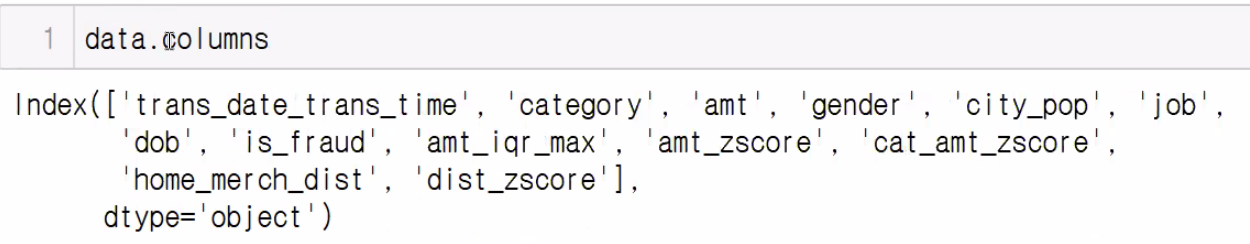
이외에 merchant, lat, long 등 도 필요없음